# Initialization

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider

provider = SaverProvider()

# Initialize simulator

In [74]:
from soft_info import RepCodeIQSimulator

DEVICE = 'ibm_sherbrooke'
DISTANCE = 3
ROUNDS = 3
OTHER_DATE = '2021-11-11'
_RESETS = False
LOGICAL = 0 # NOT NEEDED FOR EXTREME IQ BCS HARDCODED 0

_is_hex = True
if DEVICE == 'ibmq_mumbai':
    _is_hex = False

# Initialize simulator
simulator = RepCodeIQSimulator(provider, DISTANCE, ROUNDS, DEVICE, _is_hex=_is_hex, _resets = _RESETS, other_date=OTHER_DATE)

# Get IQ data

In [88]:
SHOTS = int(1e4)
NOISE_LIST = [3e-2, 0.8e-2, 1e-2, 3e-2] # [two-qubit-fidelity, reset error, measurement error, idle error]
P_AMBIG = 0.3

IQ_data = simulator.generate_IQ(SHOTS, NOISE_LIST)
IQ_data_extreme = simulator.generate_extreme_IQ(SHOTS, P_AMBIG, NOISE_LIST)

100%|██████████| 238/238 [00:00<00:00, 413.47it/s]


# Decode IQ data

In [89]:
import pymatching
import stim

model = simulator.stim_circ.detector_error_model(decompose_errors=True)
matching = pymatching.Matching.from_detector_error_model(model)

In [90]:
import cpp_soft_info

matching = pymatching.Matching.from_detector_error_model(model)

_DETAILED = True

result = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data,
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                           simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                           common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                            p_offset = 1, p_multiplicator = 1, _ntnn_edges = True)

result_extreme = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data_extreme,
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                             simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                             common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                              p_offset = 1, p_multiplicator = 1, _ntnn_edges = True)

print("num_errors:", result.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)

num_errors: 409 out of 10000 shots for _RESETS = False
num_errors EXTREME: 387 out of 10000 shots for _RESETS = False


In [91]:
matching = pymatching.Matching.from_detector_error_model(model)

p_meas = -1
# p_meas = 20e-2 


result_informed = cpp_soft_info.decode_IQ_shots_flat_informed(matching._matching_graph, IQ_data[:],
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict,
                                           p_data = -1, p_mixed = -1, p_meas = p_meas, common_measure=-1, _detailed=_DETAILED)

result_informed_extreme = cpp_soft_info.decode_IQ_shots_flat_informed(matching._matching_graph, IQ_data_extreme[:],
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict,
                                             p_data = -1, p_mixed = -1, p_meas = p_meas, common_measure=-1, _detailed=_DETAILED)

print("num_errors:", result_informed.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_informed_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)
         
# takes 1s

num_errors: 471 out of 10000 shots for _RESETS = False
num_errors EXTREME: 2100 out of 10000 shots for _RESETS = False


In [92]:
matching = pymatching.Matching.from_detector_error_model(model)
result_flat = cpp_soft_info.decode_IQ_shots_flat(matching._matching_graph, IQ_data,
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                           simulator.processed_scaler_dict, _detailed=_DETAILED)

result_flat_extreme = cpp_soft_info.decode_IQ_shots_flat(matching._matching_graph, IQ_data_extreme,
                                                         ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                                            simulator.processed_scaler_dict, _detailed=_DETAILED)

print("num_errors:", result_flat.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_flat_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)

num_errors: 480 out of 10000 shots for _RESETS = False
num_errors EXTREME: 2179 out of 10000 shots for _RESETS = False


# Plot the results

In [93]:
print("\nIQ:", result.indices, "\nFlat:", result_flat.indices, "\nInformed", result_informed.indices)
print("\nIQ EXTREME:", result_extreme.indices, "\nFlat EXTREME:", result_flat_extreme.indices, "\nInformed EXTREME", result_informed_extreme.indices)


IQ: [3286, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5350, 5659, 5758, 5759, 5762, 5763, 6043, 6185, 6460, 6520, 6657, 6748, 6767, 6769, 6807, 6930, 7058, 7085, 7100, 7154, 7242, 7283, 7327, 7385, 7631, 7703, 7736, 7740, 7776, 7787, 7867, 7885, 7978, 8007, 8047, 8109, 8111, 8115, 8128, 8146, 8165, 8166, 8167, 8168, 8169, 8170, 8195, 8258, 8289, 8372, 8373, 8374, 8375, 8376, 8377, 8379, 8380, 8381, 8382, 8576, 8577, 8587, 8593, 8594, 8659, 8667, 8673, 8717, 8728, 8732, 8901, 8963, 8964, 8965, 8966, 8967, 8968, 8969, 8970, 8988, 8991, 8993, 8999, 9005, 9061, 9085, 9088, 9131, 9132, 9133, 9134, 9135, 9136, 9137, 9138, 9139, 9140, 9141, 9142, 9143, 9144, 9145, 9194, 9206, 9246, 9279, 9282, 9283, 9284, 9285, 9310, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324, 9340, 9343, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411, 9412, 9413, 9414, 9415, 9430, 9432, 9439

-----IQ True decoding -----


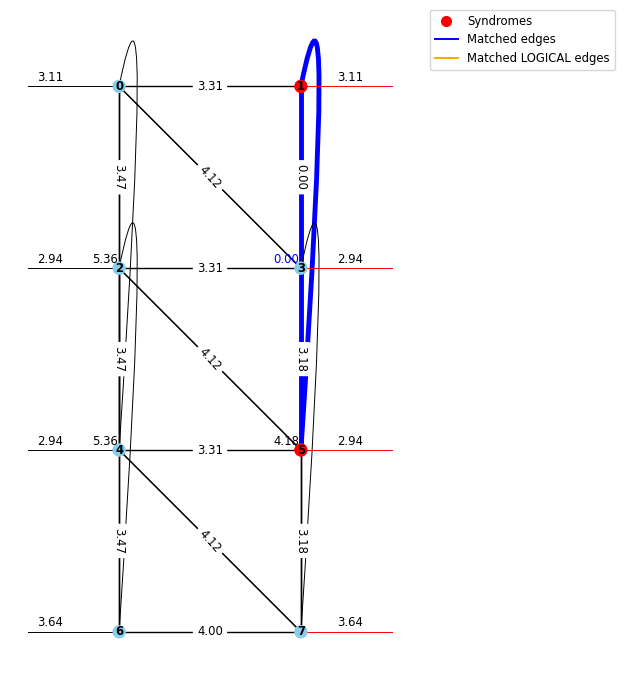

-----flat True decoding-----


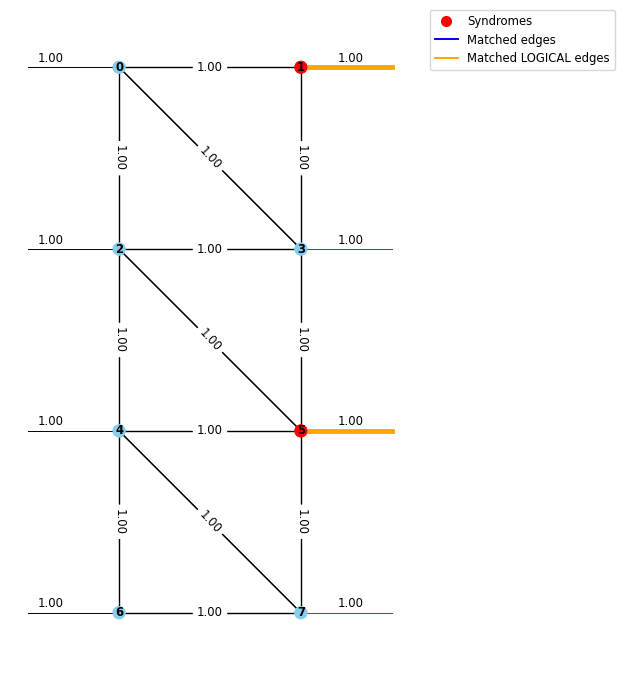

-----INFORMED True decoding-----


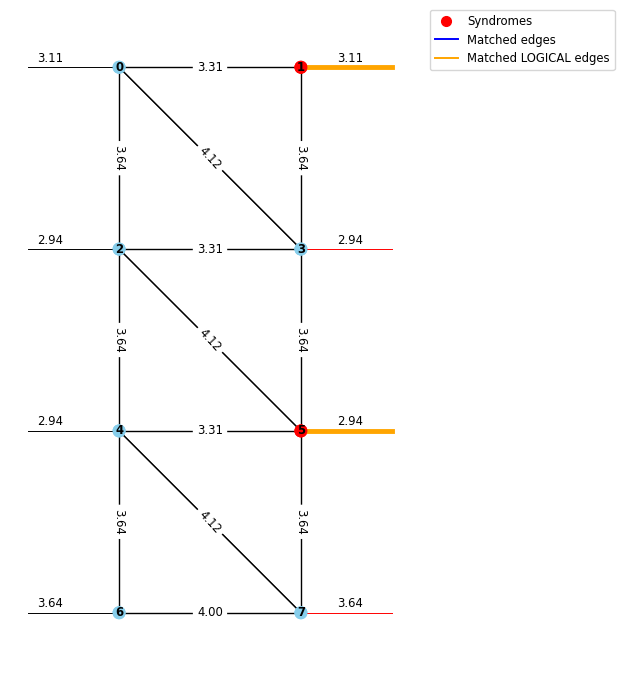

In [136]:
from soft_info import draw_matching_graph


index = 83

fig_size = (4, 13)
# fig_size = (2, 2)
scale_factor = 0.7

to_be_result = result_extreme
details = to_be_result.error_details[index]
print(f"-----IQ {bool(not (index in to_be_result.indices))} decoding -----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)

to_be_result = result_flat_extreme
details = to_be_result.error_details[index]
print(f"-----flat {bool(not (index in to_be_result.indices))} decoding-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)

to_be_result = result_informed_extreme
details = to_be_result.error_details[index]
print(f"-----INFORMED {bool(not (index in to_be_result.indices))} decoding-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)


In [95]:
informed_not_in_iq = sorted(set(result_informed.indices) - set(result.indices))
print("indices that are in informed but not in IQ with len:", len(informed_not_in_iq))
print(informed_not_in_iq)
iq_not_in_informed = sorted(set(result.indices) - set(result_informed.indices))
print("indices that are in IQ but not in informed with len:", len(iq_not_in_informed))
print(iq_not_in_informed)

print()

iq_not_in_flat = sorted(set(result.indices) - set(result_flat.indices))
print("indices that are in IQ but not in flat with len:", len(iq_not_in_flat))
print(iq_not_in_flat)
flat_not_in_iq = sorted(set(result_flat.indices) - set(result.indices))
print("indices that are in flat but not in IQ with len:", len(flat_not_in_iq))
print(flat_not_in_iq)

indices that are in informed but not in IQ with len: 98
[99, 1411, 2133, 2949, 3248, 3805, 3855, 4699, 5133, 5492, 5586, 5730, 5742, 5860, 5876, 5883, 5885, 5905, 6045, 6127, 6231, 6267, 6323, 6477, 6491, 6565, 6794, 6803, 6817, 6823, 6825, 6888, 7044, 7064, 7078, 7130, 7138, 7160, 7207, 7226, 7229, 7397, 7419, 7485, 7527, 7588, 7662, 7818, 8079, 8123, 8194, 8297, 8316, 8371, 8607, 8678, 8876, 9027, 9078, 9101, 9126, 9170, 9178, 9270, 9303, 9346, 9501, 9511, 9514, 9516, 9521, 9522, 9537, 9564, 9587, 9604, 9605, 9693, 9700, 9704, 9705, 9706, 9709, 9719, 9722, 9724, 9732, 9747, 9828, 9872, 9873, 9902, 9904, 9923, 9925, 9967, 9973, 9984]
indices that are in IQ but not in informed with len: 36
[5762, 7631, 8576, 8577, 8587, 8593, 8594, 8991, 8993, 9279, 9385, 9430, 9474, 9526, 9528, 9617, 9619, 9620, 9621, 9622, 9623, 9626, 9629, 9639, 9640, 9764, 9779, 9816, 9819, 9850, 9851, 9884, 9887, 9888, 9914, 9998]

indices that are in IQ but not in flat with len: 89
[7283, 7327, 7385, 7631, 7787, 

# Analyse specific shots

{'000 00 00 10': 1}


100%|██████████| 25/25 [00:00<00:00, 595781.82it/s]

mean time edge weight: 2.370891940954607

[(1, 5), (2, 6)]
-----IQ-----


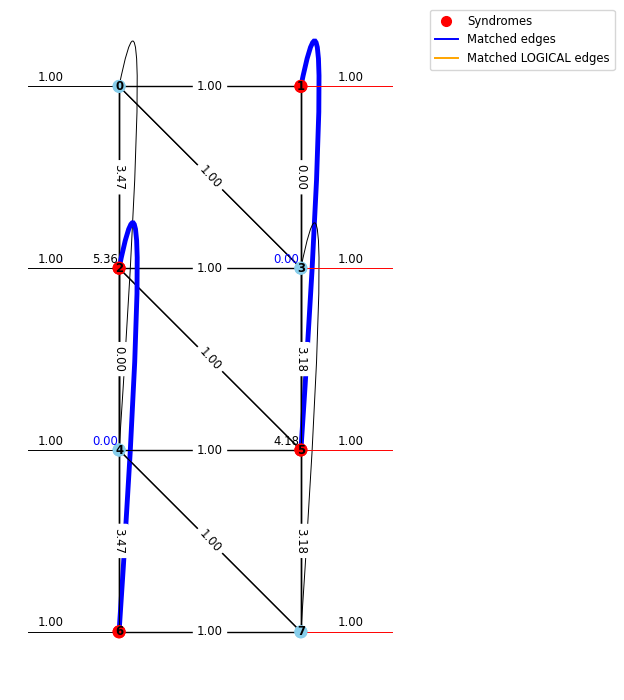

In [138]:
from tqdm import tqdm

index = 83
IQ_data_new = IQ_data[index:index+1]

esult = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data_extreme,
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                             simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                             common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                              p_offset = 1, p_multiplicator = 1, _ntnn_edges = True)

print(cpp_soft_info.get_counts(IQ_data_new, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict, ROUNDS))



to_be_result = esult
details = to_be_result.error_details[0]


mean_edge_weight = 0
num_time_edges = 0
for edge in tqdm(matching.edges()):
    src_node, tgt_node, data = edge
    if src_node == None or tgt_node == None:
        continue
    if src_node == tgt_node - (DISTANCE-1):
        mean_edge_weight += data["weight"]
        num_time_edges += 1

print("mean time edge weight:", mean_edge_weight / num_time_edges)

print()
print(details.matched_edges)

print("-----IQ-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)